### Purpose of this Project

+ Freedom has run a recent Marketing campaign promoting their value propositon
+ The total cost of this campagin was $5 million
+ There are five months of data provided, with the campaign occurring on the third month
+ It is now our turn to present to Marketing, Sales & Operations whether this campaign was successful or not

### This notebook will contain

+ Data exploration and a quantitative assessment of the campaign's performance
  - Outlining which metrics were chosen and why
  - Recommendations for company strategy to improve future campaign performance

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the first dataset - client data
client_data = pd.read_csv('data/client_data.csv')

# displaying ten random samples from the dataset
client_data.sample(n = 10, random_state = 42)

,client_id,client_geographical_region,client_residence_status,client_age
6065,686872246977897,West,Own,35
28070,470518677565299,South,Rent,56
6936,883739117234218,South,Own,36
23158,822713875250308,South,Own,52
25506,442404955135328,South,Rent,53
28636,631431542327134,West,Own,56
12027,150678144870429,South,Rent,41
10827,521971892376941,South,Own,40
12010,769453548675001,West,Own,41
10936,627255228194699,West,Own,40


In [2]:
# looking at and understanding the data types and columns in the client dataset
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46347 entries, 0 to 46346
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   client_id                   46347 non-null  int64 
 1   client_geographical_region  46347 non-null  object
 2   client_residence_status     46347 non-null  object
 3   client_age                  46347 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [3]:
# loading in the second dataset - deposit data
deposit_data = pd.read_csv('data/deposit_data.csv')

# displaying ten random samples from the dataset
deposit_data.sample(n = 10, random_state = 42)

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
229803,903285839400111,Scheduled Deposit,458.0,Monthly,2019-08-16
92181,19473282206850,Scheduled Deposit,334.0,Monthly,2019-10-08
284306,240342552445691,Actual Deposit,500.0,Biweekly,2019-10-14
117592,503016878166122,Scheduled Deposit,30.0,Biweekly,2019-07-03
453913,774929593989542,Scheduled Deposit,476.0,Monthly,2019-09-30
427363,745708866884363,Scheduled Deposit,121.0,Biweekly,2019-09-18
90436,377197113377463,Scheduled Deposit,484.0,Monthly,2019-10-18
391277,87877453117377,Actual Deposit,271.0,Biweekly,2019-09-06
417793,405758738732483,Scheduled Deposit,170.0,Biweekly,2019-09-16
454206,584109001324997,Scheduled Deposit,344.0,Monthly,2019-09-30


In [4]:
# looking at and understanding the data types and columns in the deposit dataset
deposit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


In [5]:
# loading the third dataset - calendar data
calendar_data = pd.read_csv('data/calendar_data.csv')

# displaying ten random samples from the dataset
calendar_data.sample(n = 10, random_state = 42)

,gregorian_date,month_name
84,2019-08-24,Month 3
86,2019-08-26,Month 3
97,2019-09-06,Month 4
115,2019-09-24,Month 4
29,2019-06-30,Month 1
114,2019-09-23,Month 4
78,2019-08-18,Month 3
81,2019-08-21,Month 3
18,2019-06-19,Month 1
15,2019-06-16,Month 1


In [6]:
# looking at and understanding the data types and columns in the calendar dataset
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gregorian_date  153 non-null    object
 1   month_name      153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [7]:
# merging the client and deposit data  on the client_id
df = client_data.merge(deposit_data, on = 'client_id')

In [8]:
# merging the calendar data
df = df.merge(calendar_data, how = 'left', left_on = 'deposit_date', right_on = 'gregorian_date', copy = False)

# dropping the gregorian date column
df = df.drop(columns = 'gregorian_date')

# displaying a random sample
df.sample(n = 10, random_state = 42)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
229803,785857299278044,Northeast,Own,50,Actual Deposit,206.0,Biweekly,2019-10-20,Month 5
92181,863421829222010,West,Own,38,Scheduled Deposit,628.0,Monthly,2019-07-30,Month 2
284306,490229169616749,West,Own,55,Scheduled Deposit,121.0,Biweekly,2019-07-11,Month 2
117592,708243207406045,West,Rent,40,Scheduled Deposit,706.0,Monthly,2019-08-02,Month 3
453913,38088639566247,Northeast,Own,73,Actual Deposit,398.0,Monthly,2019-08-15,Month 3
427363,253451236144307,West,Own,69,Actual Deposit,600.0,Extra,2019-06-22,Month 1
90436,138146421326438,South,Own,38,Actual Deposit,982.0,Monthly,2019-09-16,Month 4
391277,357249266343996,South,Own,64,Actual Deposit,199.0,Biweekly,2019-07-19,Month 2
417793,989835480580028,South,Own,67,Actual Deposit,389.0,Biweekly,2019-09-18,Month 4
454206,657010099818145,South,Rent,73,Actual Deposit,214.0,Monthly,2019-07-20,Month 2


### Exploring the dataset

+ Understand the columns in the dataset
+ Questions that come to mind:
1. How many regions are there and is the data balanced or imbalanced?
2. How many different resident statuses are there, and what does that distribution look like?
3. Distribution of age in the dataset
4. Financials by age, average deposit amount? Resident status by age?
5. Distribution of days by month (How many days in each month)

In [9]:
# taking a deeper dive into the regions and the distribution, using the .value_counts() function
df['client_geographical_region'].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [10]:
# understanding the distribution of resident status
df['client_residence_status'].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [11]:
# looking at the age distribution in the dataset, let's look at the minimum age
min_age = df['client_age'].min()

# now looking for the max client age in the dataset
max_age = df['client_age'].max()

# printing out statement identifying the min and max age
print(f"The youngest clients in the dataset are {min_age} years old, while the eldest is {max_age} years old")

The youngest clients in the dataset are 21 years old, while the eldest is 105 years old


### About the client ages

+ Create a visual that shows the distribution of ages in the dataset
+ It is great that we know the youngest and eldest, but where are most clients in terms of age?

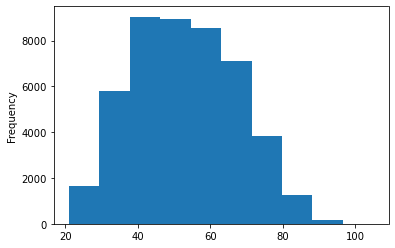

In [12]:
# creating a visual to understand the age distribution in the dataset
age_dist = client_data['client_age'].plot(kind = 'hist')

### Key takeaway from the histogram

+ Most clients in the dataset are between the ages 40 to 70

### Next...

+ Let's take a look at the distribution of days across the 5 months of data
+ Are they all 30 days? Are there any 28 or 31?

### After that

+ The type of candence of the deposits are also categorial
+ Therefore, there is a high chance we will be doing some grouping or plots around them
+ There are two deposit types, actual and scheduled - we will need to understand that distribution
+ There are three different types of deposit cadences: monthly, biweekly, and extra - another area that we will need to explore the distribution

In [13]:
# looking at the calendar days distribution using the value_counts() function
calendar_data['month_name'].value_counts()

Month 3    31
Month 2    31
Month 5    31
Month 4    30
Month 1    30
Name: month_name, dtype: int64

In [14]:
# getting the earliest date in the dataset
min_date = df['deposit_date'].min()

# getting the latest date in the dataset
max_date = df['deposit_date'].max()

# printing out statement including both min and max date
print(f"The dataset ranges from dates {min_date} to {max_date}")

The dataset ranges from dates 2019-06-01 to 2019-10-31


### Deposit types and cadences

+ They are categorical variables
+ Meaning, groupings and plotting is a likely possibility so it's worth exploring the values and their overall distribution

In [15]:
# getting a breakdown of the deposit types: scheduled and deposit
df['deposit_type'].value_counts()

Scheduled Deposit    247986
Actual Deposit       232408
Name: deposit_type, dtype: int64

In [16]:
# now looking at the three different types of deposit cadences and their distribution
df['deposit_cadence'].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

In [17]:
# checking the data types using the .info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480394 entries, 0 to 480393
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   client_id                   480394 non-null  int64  
 1   client_geographical_region  480394 non-null  object 
 2   client_residence_status     480394 non-null  object 
 3   client_age                  480394 non-null  int64  
 4   deposit_type                480394 non-null  object 
 5   deposit_amount              480394 non-null  float64
 6   deposit_cadence             480394 non-null  object 
 7   deposit_date                480394 non-null  object 
 8   month_name                  480394 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 36.7+ MB


### Now on to the deposit amount

+ In the current state, deposit_date is an object
+ For easier manipulation, we can use the [.to_datetime function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) which will convert it to a datetime data type

In [18]:
# converting the deposit date from object to a datetime object
df['deposit_date'] = pd.to_datetime(df['deposit_date'])

# extracting the month from deposit data using the .to_datetime function and storing it in a new column
df['deposit_month'] = pd.to_datetime(df['deposit_date']).dt.month

# now time to calculate the deposit amount grouped by month number
monthly_amounts = df.groupby('month_name')['deposit_amount'].sum().reset_index()

# adding a new column with the previous month value
monthly_amounts['previous_month'] = monthly_amounts['deposit_amount'].shift(1).fillna(0)

# calculating the month over month deposit performance to determine if it increased or decreased and by what percentage %
monthly_amounts['MoM_performance'] = round((monthly_amounts['deposit_amount'] - monthly_amounts['previous_month'])/monthly_amounts['previous_month'] * 100, 2) 

# displaying the monthly amount total, which will set up the visualization
monthly_amounts

,month_name,deposit_amount,previous_month,MoM_performance
0,Month 1,29284830.86,0.00,inf
1,Month 2,29886431.27,29284830.86,2.05
2,Month 3,39675057.10,29886431.27,32.75
3,Month 4,38515819.73,39675057.10,-2.92
4,Month 5,38081175.23,38515819.73,-1.13


### Monthly Amounts Takeaways

+ Deposit amounts start to slowly increase in Month 2, then see a 32% increase in Month 3
+ If the marketing campaign happened in Month 3, then one can begin to assume that the campaign did have a success in increase deposit amounts
+ However, it is important to look at the performances in Month 4 and 5 to determine whether it was a shorter-term fix or if it had a longer-term impact on the business
+ Months 4 and 5 do see a decrease in deposit amount, but is bringing close an additional 900K per month in comparison to months 1 and 2

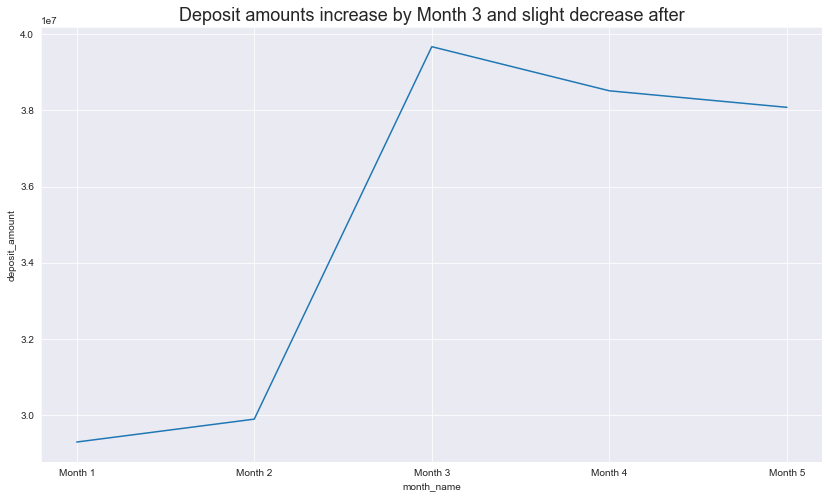

In [19]:
# setting plot style to dark grid
sns.set_style('darkgrid')

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.lineplot(data = monthly_amounts, x = 'month_name', y = 'deposit_amount', ax = ax)

# updating the plot title and size 
plt.title('Deposit amounts increase by Month 3 and slight decrease after', fontdict = {'fontsize' : fontsize})

# displaying the plot
plt.show();

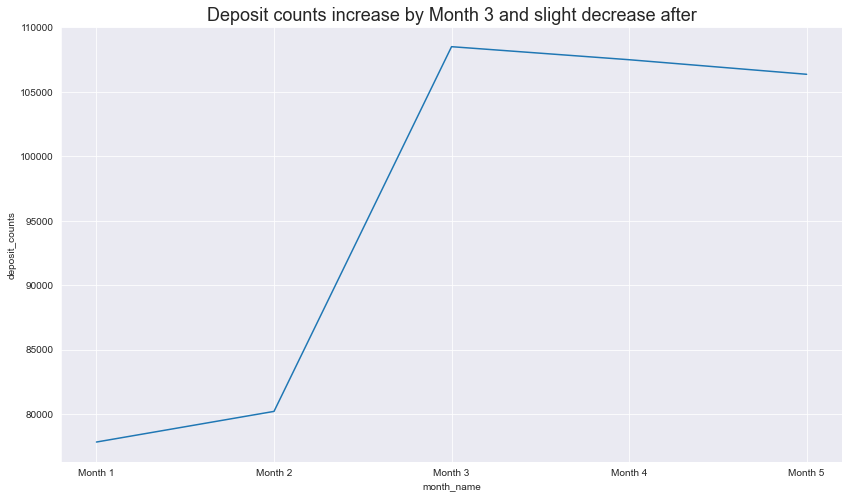

In [20]:
# let's take a look at the number of deposits to understand if it is similar to the amounts graph above

# now time to calculate the deposit amount grouped by month number
monthly_deposit_count = df.groupby('month_name')['deposit_amount'].count().reset_index().rename({"deposit_amount" : "deposit_counts"}, axis = 1)

# setting plot style to dark grid
sns.set_style('darkgrid')

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.lineplot(data = monthly_deposit_count, x = 'month_name', y = 'deposit_counts', ax = ax)

# updating the plot title and size 
plt.title('Deposit counts increase by Month 3 and slight decrease after', fontdict = {'fontsize' : fontsize})

# displaying the plot
plt.show();

### Deposit Amounts by Deposit Type

__Distribution of Deposit Amount by Deposit Type__

+ Is there an inbalance between actual vs. scheduled deposits?
+ If there is, is the difference significant?

### After analyzing by deposit type

+ What about the distribution between deposit cadence?
+ Is or are there cadences that are driving most of the revenue?

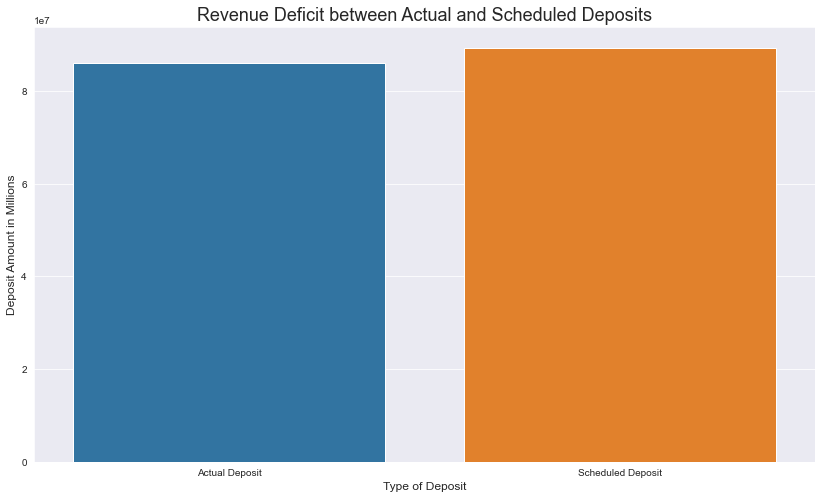

In [21]:
# building a new dataframe named deposit_type, which is the total sum of revenue grouped by deposit type
deposit_type = df.groupby('deposit_type')['deposit_amount'].sum().reset_index()

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.barplot(data = deposit_type, x = 'deposit_type', y = 'deposit_amount', ax = ax)

# updating the plot title and size 
plt.title('Revenue Deficit between Actual and Scheduled Deposits', fontdict = {'fontsize' : fontsize})

# updating the y-axis label and increasing the font size
plt.ylabel('Deposit Amount in Millions', fontsize = axfont)

# updating the x-axis label and increasing the font size
plt.xlabel('Type of Deposit', fontsize = axfont)

# displaying the plot
plt.show();

### Now looking at revenue by Deposit Cadence

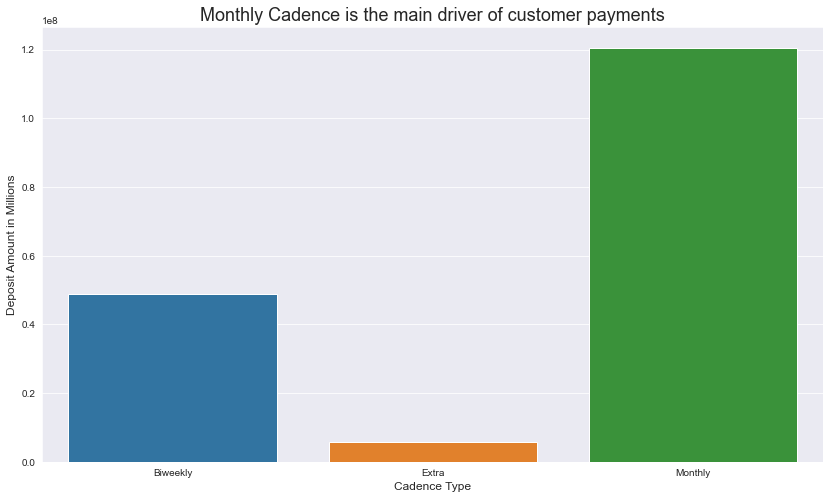

In [22]:
# building a new dataframe named deposit_cadence, which is the total sum of revenue grouped by deposit cadence
deposit_cadence = df.groupby('deposit_cadence')['deposit_amount'].sum().reset_index()

# # creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.barplot(data = deposit_cadence, x = 'deposit_cadence', y = 'deposit_amount', ax = ax)

# updating the plot title and size 
plt.title('Monthly Cadence is the main driver of customer payments', fontdict = {'fontsize' : fontsize})

# updating the y-axis label and increasing the font size
plt.ylabel('Deposit Amount in Millions', fontsize = axfont)

# updating the x-axis label and increasing the font size
plt.xlabel('Cadence Type', fontsize = axfont)

# displaying the plot
plt.show();

In [23]:
# displaying first ten rows of dataframe
df.sample(n = 10, random_state = 42)

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,deposit_month
229803,785857299278044,Northeast,Own,50,Actual Deposit,206.0,Biweekly,2019-10-20,Month 5,10
92181,863421829222010,West,Own,38,Scheduled Deposit,628.0,Monthly,2019-07-30,Month 2,7
284306,490229169616749,West,Own,55,Scheduled Deposit,121.0,Biweekly,2019-07-11,Month 2,7
117592,708243207406045,West,Rent,40,Scheduled Deposit,706.0,Monthly,2019-08-02,Month 3,8
453913,38088639566247,Northeast,Own,73,Actual Deposit,398.0,Monthly,2019-08-15,Month 3,8
427363,253451236144307,West,Own,69,Actual Deposit,600.0,Extra,2019-06-22,Month 1,6
90436,138146421326438,South,Own,38,Actual Deposit,982.0,Monthly,2019-09-16,Month 4,9
391277,357249266343996,South,Own,64,Actual Deposit,199.0,Biweekly,2019-07-19,Month 2,7
417793,989835480580028,South,Own,67,Actual Deposit,389.0,Biweekly,2019-09-18,Month 4,9
454206,657010099818145,South,Rent,73,Actual Deposit,214.0,Monthly,2019-07-20,Month 2,7


### Distribution of cadence types - Exploration

+ Explore deposit cadence types by month - Is there a specific cadence type that saw greater success? Are there some that did not perform well?
+ What about geographical locations?
+ Is there a region that provides a large percentage of the deposit amount?
+ Like the cadences, are there regions that performed better than others? Are there regions that did not experience a positive jump?


### Deposit amount by cadence and month

In [24]:
# creating a dataframe grouped by cadence and month name, the aggregation is deposit amount summed by cadence and month
monthly_cadence_df = df.groupby(['deposit_cadence', 'month_name'])['deposit_amount'].sum().reset_index()

# displaying the dataframe to ensure it worked
monthly_cadence_df

,deposit_cadence,month_name,deposit_amount
0,Biweekly,Month 1,8067092.64
1,Biweekly,Month 2,8276132.98
2,Biweekly,Month 3,10924866.19
3,Biweekly,Month 4,10901797.30
4,Biweekly,Month 5,10809396.84
5,Extra,Month 1,862681.06
6,Extra,Month 2,967124.39
7,Extra,Month 3,1723684.35
8,Extra,Month 4,1215140.53
9,Extra,Month 5,1094136.23


### Understanding the date range

In [25]:
# printing out statement including both min and max date
print(f"The dataset ranges from dates {min_date} to {max_date}")

The dataset ranges from dates 2019-06-01 to 2019-10-31


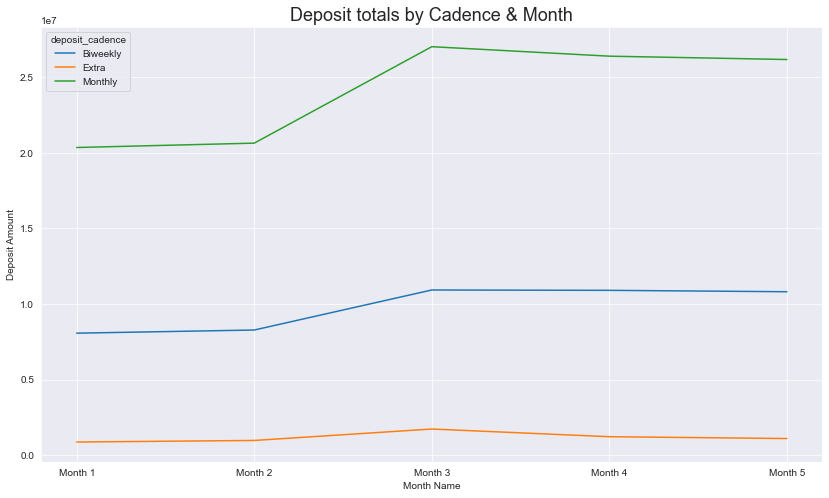

In [26]:
# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.lineplot(data = monthly_cadence_df, x = 'month_name', y = 'deposit_amount', ax = ax, hue = 'deposit_cadence')

# renaming the label on the x-axis
ax.set_xlabel('Month Name')

# renaming the label on the x-axis
ax.set_ylabel('Deposit Amount')

# updating the plot title and size 
plt.title('Deposit totals by Cadence & Month', fontdict = {'fontsize' : fontsize})

# displaying the plot
plt.show();

### Insights from the graph above

+ Monthly deposits experienced the biggest jump after the Marketing campaign
+ Biweekly deposits also increased, but not at the same rate or level as monthly deposites
+ Extra deposits increased during the month of the campaign but leveled back to normal by Month 4

### Deposits by region

+ What about geographical locations?
+ Is there a region that provides a large percentage of the deposit amount?
+ Like the cadences, are there regions that performed better than others? Are there regions that did not experience a positive jump?

In [27]:
# creating a dataframe grouped by geographical region and month name, the aggregation is deposit amount summed by region and month
geo_cadence_df = df.groupby(['client_geographical_region', 'month_name'])['deposit_amount'].sum().reset_index()

# displaying the dataframe and the results
geo_cadence_df

,client_geographical_region,month_name,deposit_amount
0,Midwest,Month 1,5430601.52
1,Midwest,Month 2,5499689.53
2,Midwest,Month 3,7229628.36
3,Midwest,Month 4,7176212.72
4,Midwest,Month 5,7069993.34
5,Northeast,Month 1,4445002.60
6,Northeast,Month 2,4629536.48
7,Northeast,Month 3,6284626.55
8,Northeast,Month 4,6068852.58
9,Northeast,Month 5,5996444.67


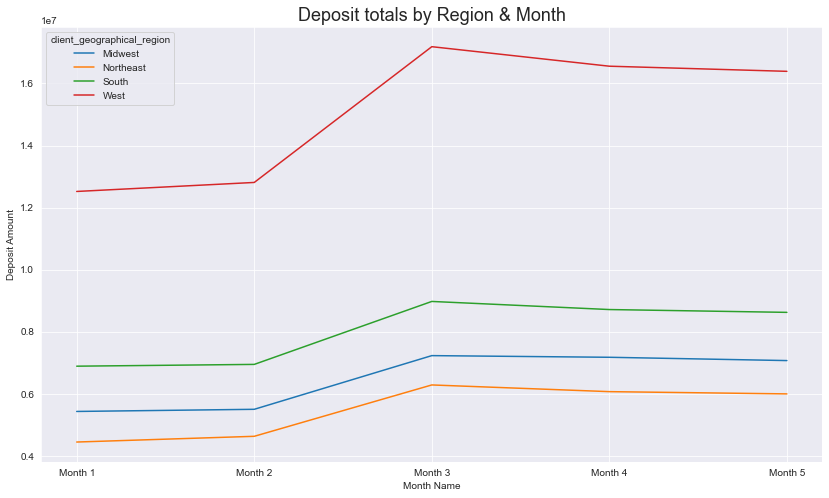

In [28]:
# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.lineplot(data = geo_cadence_df, x = 'month_name', y = 'deposit_amount', ax = ax, hue = 'client_geographical_region')

# renaming the label on the x-axis
ax.set_xlabel('Month Name')

# renaming the label on the x-axis
ax.set_ylabel('Deposit Amount')

# updating the plot title and size 
plt.title('Deposit totals by Region & Month', fontdict = {'fontsize' : fontsize})

# displaying the plot
plt.show();

### Deposits by Residence Status

+ What percentage of customers own their property as opposed to renting?
+ Does either status experience a bigger jump with the promotion?
+ After the month of promotion, do their performances remain consistent or is there a drop in revenue for either?

In [29]:
# creating a dataframe grouped by residence status (own or rent) and month name, the aggregation is deposit amount summed 
residence_status_df = df.groupby(['client_residence_status', 'month_name'])['deposit_amount'].sum().reset_index()

# displaying the dataframe and the results
residence_status_df

,client_residence_status,month_name,deposit_amount
0,Own,Month 1,22344080.71
1,Own,Month 2,22671253.99
2,Own,Month 3,30471048.50
3,Own,Month 4,29387910.27
4,Own,Month 5,29066388.57
5,Rent,Month 1,6940750.15
6,Rent,Month 2,7215177.28
7,Rent,Month 3,9204008.60
8,Rent,Month 4,9127909.46
9,Rent,Month 5,9014786.66


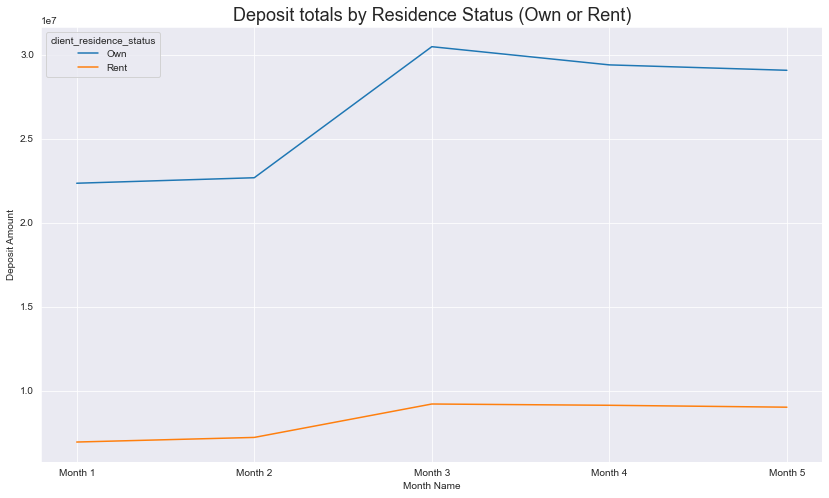

In [30]:
# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 8))

# defining font sizes for the plot elements
fontsize = 18
axfont = 12

# plotting the deposit amount data with seaborn
sns.lineplot(data = residence_status_df, x = 'month_name', y = 'deposit_amount', ax = ax, hue = 'client_residence_status')

# renaming the label on the x-axis
ax.set_xlabel('Month Name')

# renaming the label on the x-axis
ax.set_ylabel('Deposit Amount')

# updating the plot title and size 
plt.title('Deposit totals by Residence Status (Own or Rent)', fontdict = {'fontsize' : fontsize})

# displaying the plot
plt.show();

### Question 1: Provide a quantitative assessment of whether the marketing campaign was successful. What metrics were chosen and why?

#### Approach

1. Defining metrics 
    - Revenue: Total Revenue Deposited
    - Customer Acquisition: Percentage Increase in new Clients making their first deposit with Freedom
    - Returning Customers: Percentage Increase in number of clients who stopped making payments to return

# Revenue Metrics

### Revenue Performance

+ Did revenue increase after the promotion?
+ If there was an increase in revenue, did it remain relatively consistent after the promotion?

In [31]:
# creating a new dataframe which is grouped by the month name and summing the deposit amounts in each month
deposit_by_month = df.groupby('month_name')['deposit_amount'].sum().reset_index()

# creating a new column named previous amount, which is the deposit amount shifted or leading in SQL terms
deposit_by_month['previous_amount'] = deposit_by_month['deposit_amount'].shift(1)

# now creating a new column called rev_performance which is the total difference in revenue from the first month of revenue
deposit_by_month['rev_performance'] = deposit_by_month['deposit_amount'] - deposit_by_month['deposit_amount'].min()

# defining a function to format a numeric value with commas and two decimal places
def format_int_with_commas(x):
    return '{:,.2f}'.format(float(x)) if pd.notnull(x) and x != '' else ''

# defining a function to apply format_int_with_commas to specified columns
def format_columns_with_commas(df, columns):
    for col in columns:
        df[col] = df[col].map(format_int_with_commas)
        
# List of columns to format
columns_to_format = ['deposit_amount', 'previous_amount']

# Apply formatting using the function
format_columns_with_commas(deposit_by_month, columns_to_format)        

# displaying the dataframe
deposit_by_month

,month_name,deposit_amount,previous_amount,rev_performance
0,Month 1,"29,284,830.86",,0.00
1,Month 2,"29,886,431.27","29,284,830.86",601600.41
2,Month 3,"39,675,057.10","29,886,431.27",10390226.24
3,Month 4,"38,515,819.73","39,675,057.10",9230988.87
4,Month 5,"38,081,175.23","38,515,819.73",8796344.37


In [32]:
deposit_by_month[(deposit_by_month['month_name'] == 'Month 3') | (deposit_by_month['month_name'] == 'Month 4') | (deposit_by_month['month_name'] == 'Month 5')]['rev_performance'].sum()

28417559.48000004

# Customer Metrics

In [33]:
# creating a new dataframe which is grouped by the month name and summing the deposit amounts in each month
clients_by_month = df.groupby('month_name')['client_id'].nunique().reset_index()

# displaying the dataframe
clients_by_month

,month_name,client_id
0,Month 1,32140
1,Month 2,32757
2,Month 3,43806
3,Month 4,40840
4,Month 5,40718


In [34]:
# filtering the ids of unique customers in months 1 and 2 using the .unique() function
pre_campaign_clients = df[(df['month_name'] == 'Month 1') | (df['month_name'] == 'Month 2')]['client_id'].unique()

# filtering the total number of unique customers in months 1 and 2 using the .nunique() function
pre_campaign_clients_count = df[(df['month_name'] == 'Month 1') | (df['month_name'] == 'Month 2')]['client_id'].nunique()

# printing out the statement with the total number of unique customers
print(f"The total number of clients prior to the campaign was {pre_campaign_clients_count}")

The total number of clients prior to the campaign was 34051


In [35]:
# filtering the ids of unique customers in months 1 and 2 using the .unique() function
campaign_clients = df[df['month_name'] == 'Month 3']['client_id'].unique()

# filtering the total number of unique customers in month 3 using the .nunique() function
campaign_clients_count = df[df['month_name'] == 'Month 3']['client_id'].nunique()

# printing out statement with the total number of unique customers
print(f"The total number of clients prior to the campaign was {campaign_clients_count}")

The total number of clients prior to the campaign was 43806


In [36]:
# filtering the ids of unique customers in months 1 and 2 using the .unique() function
post_campaign_clients = df[(df['month_name'] == 'Month 4') | (df['month_name'] == 'Month 5')]['client_id'].unique()

# filtering the total number of unique customers in months 4 and 5 using the .nunique() function
post_campaign_clients = df[(df['month_name'] == 'Month 4') | (df['month_name'] == 'Month 5')]['client_id'].nunique()

# printing out statement with the total number of unique customers
print(f"The total number of clients prior to the campaign was {post_campaign_clients}")

The total number of clients prior to the campaign was 41862


### How many customers were acquired?

#### Approach

+ Defining a new customer: How is a new customer defined?
+ Answer: When a client makes their first deposit during the campaign.
+ Calculate the total number of customers who made their first deposit during the month of the campaign vs. the two months prior to the campaign launching.

#### Calculating the answer

+ Take the total number of unique client id's during the month of the campaign and subtract it by the total number of unique client id's in Months 1 & 2
+ Calculate the difference in both sets using the [.difference()](https://www.geeksforgeeks.org/python-set-difference/) function

In [37]:
len(set(campaign_clients).difference(set(pre_campaign_clients)))

11544